Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
import pandas as pd

# Load yelp, fsq and citybike from the saved CSV files
citybike_df = pd.read_csv("C:\\Users\\iykeo\\OneDrive\\Desktop\\join\\df.csv")
ylp_df = pd.read_csv("C:\\Users\\iykeo\\OneDrive\\Desktop\\join\\ylp_df.csv")
fsq_df = pd.read_csv("C:\\Users\\iykeo\\OneDrive\\Desktop\\join\\fsq_df.csv")

In [3]:
#Printing to validate the loading process
citybike_df.head()

,Name,Latitude,Longitude,Number of Bikes
0,Queen St E / Woodward Ave,43.665269,-79.319796,18
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,1
2,Queen St. E / Rhodes Ave.,43.666224,-79.317693,10
3,Bond St / Queen St E,43.653236,-79.376716,1
4,Church St / Alexander St,43.663722,-79.380288,6


In [5]:
#Printing the yelp API foursquare for validation
ylp_df.head()
fsq_df.head()

In [12]:
#merging fsq and yelp
fy_df = ylp_df.merge(fsq_df, how='left', on='id')

In [13]:
#Printing merged file for validation
fy_df.head(2)

,id,name,image_url,is_closed,url,review_count,categories,rating,coordinates,location,...,fsq_categories,fsq_distance,fsq_geocodes,fsq_link,fsq_name,fsq_timezone,fsq_location,Unnamed: 9,Latitude,Longitude
0,yP71_LfUPnGIRqA2g09RoQ,Lake Inez,https://s3-media3.fl.yelpcdn.com/bphoto/vg38w5...,False,https://www.yelp.com/biz/lake-inez-toronto?adj...,94,Asian Fusion,4.5,"{'latitude': 43.67234, 'longitude': -79.32064}","1471 Gerrard Street E, Toronto, ON M4L 2A1, Ca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ohengzi4viLEXqhK50aLxg,Jaclyn's,https://s3-media3.fl.yelpcdn.com/bphoto/XCWKUb...,False,https://www.yelp.com/biz/jaclyns-toronto?adjus...,16,Caribbean,4.5,"{'latitude': 43.66627, 'longitude': -79.31802}","1588 Queen Street E, Toronto, ON M4L 1G1, Canada",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#merging output of fsq & yelp with citybike
projectx_df = fy_df.merge(citybike_df, how='left', on='Longitude')

In [15]:
#Printing to validate result
projectx_df.head(2)

,id,name,image_url,is_closed,url,review_count,categories,rating,coordinates,location,...,fsq_link,fsq_name,fsq_timezone,fsq_location,Unnamed: 9,Latitude_x,Longitude,Name,Latitude_y,Number of Bikes
0,yP71_LfUPnGIRqA2g09RoQ,Lake Inez,https://s3-media3.fl.yelpcdn.com/bphoto/vg38w5...,False,https://www.yelp.com/biz/lake-inez-toronto?adj...,94,Asian Fusion,4.5,"{'latitude': 43.67234, 'longitude': -79.32064}","1471 Gerrard Street E, Toronto, ON M4L 2A1, Ca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ohengzi4viLEXqhK50aLxg,Jaclyn's,https://s3-media3.fl.yelpcdn.com/bphoto/XCWKUb...,False,https://www.yelp.com/biz/jaclyns-toronto?adjus...,16,Caribbean,4.5,"{'latitude': 43.66627, 'longitude': -79.31802}","1588 Queen Street E, Toronto, ON M4L 1G1, Canada",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save fsq_df to a CSV file to study the data in csv/excel
projectx_df.to_csv('projectx_df.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [16]:
import pandas as pd
import numpy as np


# Load projectx_df from the saved CSV files
projectx_df = pd.read_csv("C:\\Users\\iykeo\\OneDrive\\Desktop\\join\\projectx_df.csv")
citybike_df = pd.read_csv("C:\\Users\\iykeo\\OneDrive\\Desktop\\join\\df.csv")
projectx1_df = pd.read_csv("C:\\Users\\iykeo\\OneDrive\\Desktop\\projectx1_df.csv")

In [18]:
projectx_df['region']

0      {'center': {'longitude': -79.319796, 'latitude...
1      {'center': {'longitude': -79.319796, 'latitude...
2      {'center': {'longitude': -79.319796, 'latitude...
3      {'center': {'longitude': -79.319796, 'latitude...
4      {'center': {'longitude': -79.319796, 'latitude...
                             ...                        
145    {'center': {'longitude': -79.317693, 'latitude...
146    {'center': {'longitude': -79.317693, 'latitude...
147    {'center': {'longitude': -79.317693, 'latitude...
148    {'center': {'longitude': -79.317693, 'latitude...
149    {'center': {'longitude': -79.317693, 'latitude...
Name: region, Length: 150, dtype: object

In [ ]:
#Normalizing data

In [ ]:
import json
import pandas as pd

# Replace single quotes with double quotes in 'region' column
projectx_df['region'] = projectx_df['region'].str.replace("'", '"')

# Convert string values to JSON objects
projectx_df['region'] = projectx_df['region'].apply(json.loads)

# Normalize the 'region' column
normalized_df = pd.json_normalize(projectx_df['region'])

In [ ]:
# Replace single quotes with double quotes in 'region' column
projectx_df['coordinates'] = projectx_df['coordinates'].str.replace("'", '"')

# Convert string values to JSON objects
projectx_df['coordinates'] = projectx_df['coordinates'].apply(json.loads)

# Normalize the 'region' column
normalized_coordinates_df = pd.json_normalize(projectx_df['coordinates'])


In [ ]:
#concate projectx_df and normalized_df

projectx_df = pd.concat([merged_df, normalized_coordinates_df], axis=1)
#projectx_df

In [ ]:
# Drop redundant columns 
projectx_df.drop(columns=['coordinates', 'region'], inplace=True)

In [ ]:
# Make a copy of the DataFrame
projectx1_df = projectx_df.copy()

In [19]:
citybike_df.head(2)

,Name,Latitude,Longitude,Number of Bikes
0,Queen St E / Woodward Ave,43.665269,-79.319796,18
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,1


In [ ]:
merged_df = projectx1_df.merge(citybike_df, how='left', on='Latitude')

In [21]:
merged_df.isnull().sum()

id                      0
name                    0
image_url               0
is_closed               0
url                     0
review_count            0
categories              0
rating                  0
location               16
display_phone           8
distance                0
Longitude_x             0
Latitude                0
coordinate_latitude     0
Cordinate_longitude     0
Address                 0
Longitude_y             0
Number of Bikes         0
dtype: int64

In [22]:
duplicate_rows_df = merged_df[merged_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 18)


In [23]:
merged_df.describe()

,review_count,rating,distance,Longitude_x,Latitude,coordinate_latitude,Cordinate_longitude,Longitude_y,Number of Bikes
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,66.366667,3.913333,718.361593,-79.361145,43.667638,43.670273,-79.362395,-79.361145,9.666667
std,107.053422,0.625913,273.518521,0.060171,0.002712,0.004911,0.058468,0.060171,6.967486
min,1.000000,1.000000,29.257263,-79.445947,43.665269,43.662424,-79.455680,-79.445947,1.000000
25%,16.000000,3.500000,627.117909,-79.445947,43.665269,43.666256,-79.438931,-79.445947,1.000000
50%,40.000000,4.000000,786.763900,-79.319796,43.666224,43.671480,-79.324600,-79.319796,10.000000
75%,63.000000,4.500000,884.295414,-79.317693,43.671420,43.672670,-79.319730,-79.317693,18.000000
max,594.000000,5.000000,1246.590931,-79.317693,43.671420,43.679600,-79.307099,-79.317693,18.000000


In [ ]:
# Save fsq_df to a CSV file to study the data in csv/excel
merged_df.to_csv('merged_df.csv', index=False)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load merged_df saved as csv
merged_df = pd.read_csv("C:\\Users\\iykeo\\OneDrive\\Desktop\\merged_df.csv")

In [24]:
merged_df.shape

(150, 18)

In [25]:
merged_df.columns

Index(['id', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'location', 'display_phone', 'distance',
       'Longitude_x', 'Latitude', 'coordinate_latitude', 'Cordinate_longitude',
       'Address', 'Longitude_y', 'Number of Bikes'],
      dtype='object')

In [ ]:
#using Bar plots to visualize the counts or frequencies of categorical variables, such as categories.

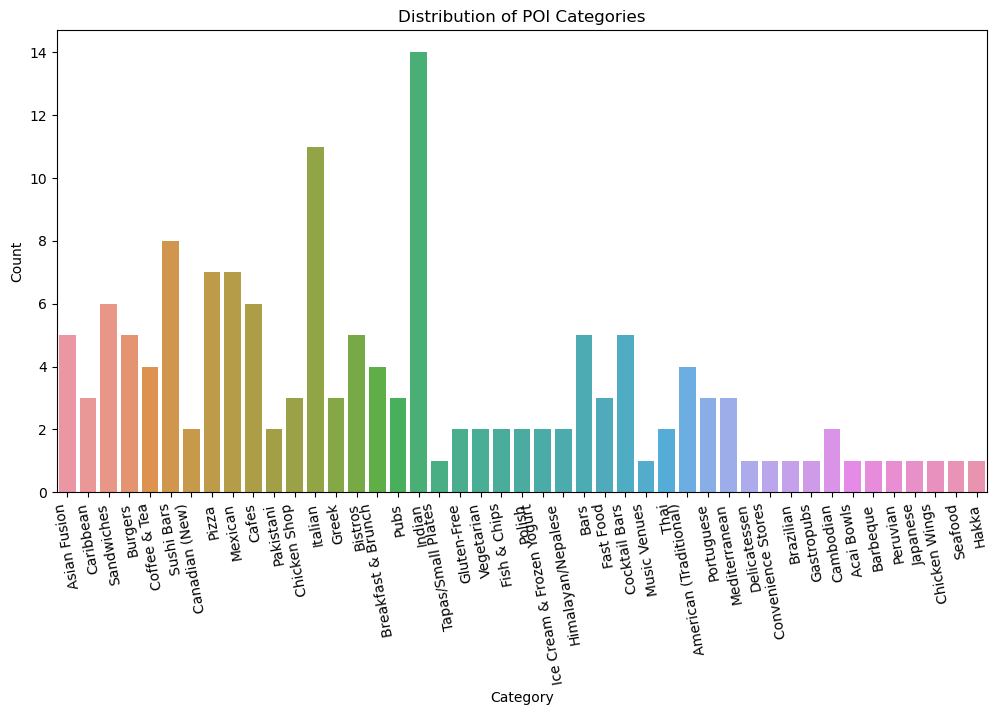

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='categories', data=merged_df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of POI Categories')
plt.xticks(rotation=100)
plt.show()

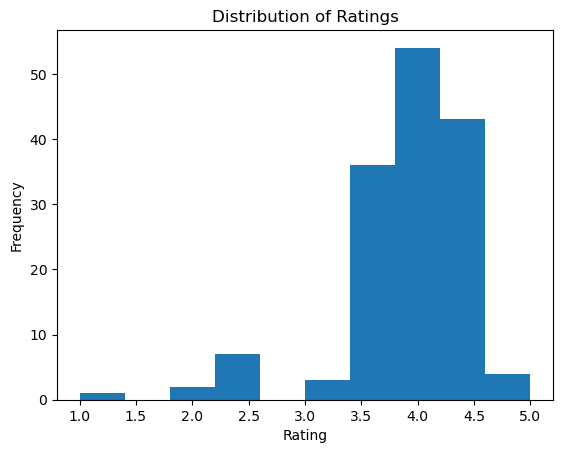

In [27]:
#examining numerical values with Histogram
plt.hist(merged_df['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

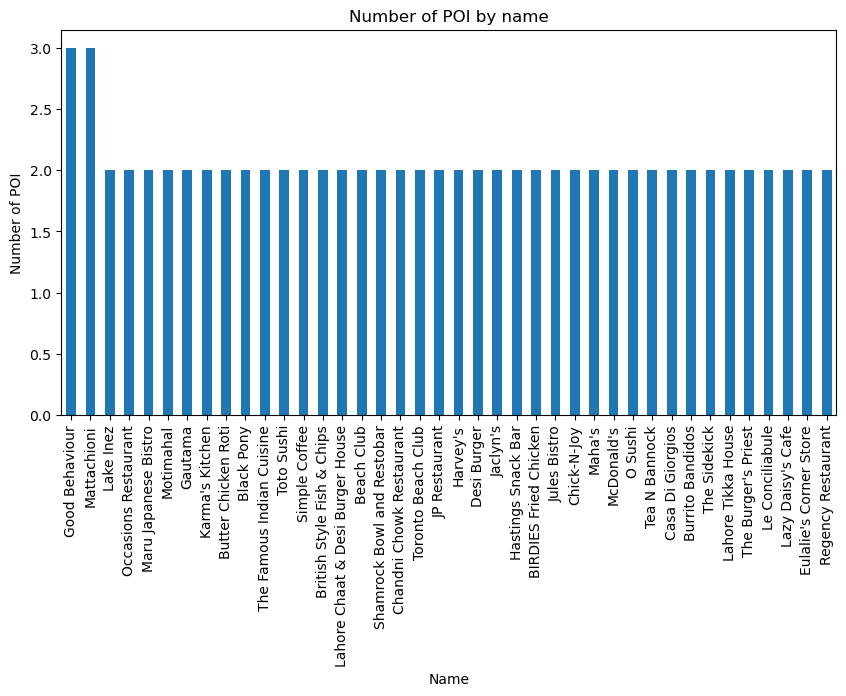

In [28]:
merged_df.name.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of POI by name")
plt.ylabel('Number of POI')
plt.xlabel('Name');

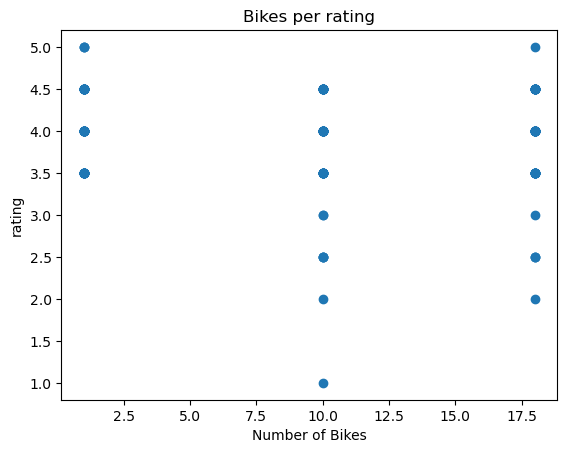

In [29]:
#Using scatterplot to explore relationships between valuables

plt.scatter(merged_df['Number of Bikes'], merged_df['rating'])
plt.xlabel('Number of Bikes')
plt.ylabel('rating')
plt.title('Bikes per rating')
plt.show()

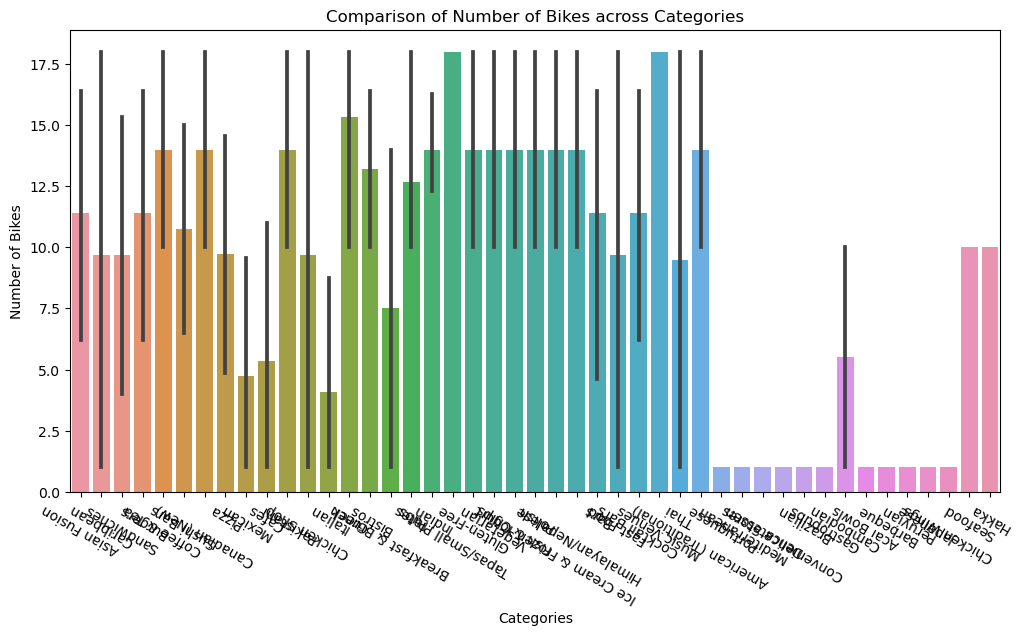

In [31]:
#Comparing number of bikes acrross categories
plt.figure(figsize=(12, 6))
sns.barplot(x='categories', y='Number of Bikes', data=merged_df)
plt.xlabel('Categories')
plt.ylabel('Number of Bikes')
plt.title('Comparison of Number of Bikes across Categories')
plt.xticks(rotation=150)
plt.show()

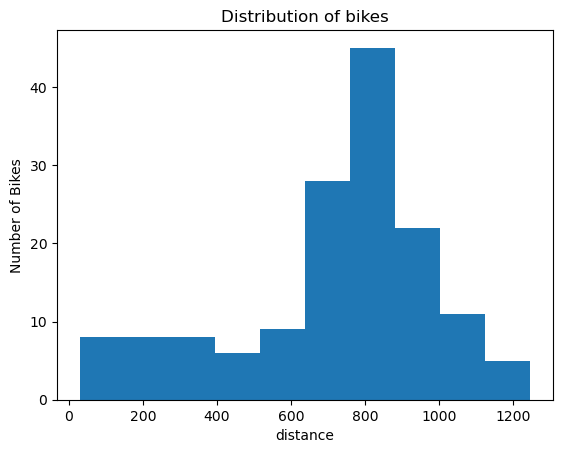

In [32]:
#examining numerical values with Histogram
#Distribution of bikes by distance
plt.hist(merged_df['distance'], bins=10)
plt.xlabel('distance')
plt.ylabel('Number of Bikes')
plt.title('Distribution of bikes')
plt.show()

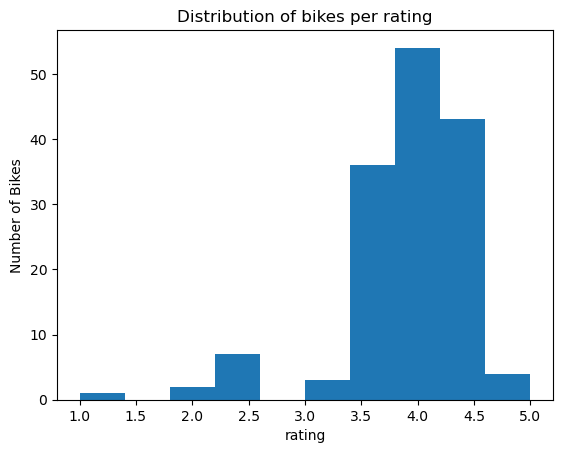

In [33]:
#Distribution of bikes by ratings
plt.hist(merged_df['rating'], bins=10)
plt.xlabel('rating')
plt.ylabel('Number of Bikes')
plt.title('Distribution of bikes per rating')
plt.show()

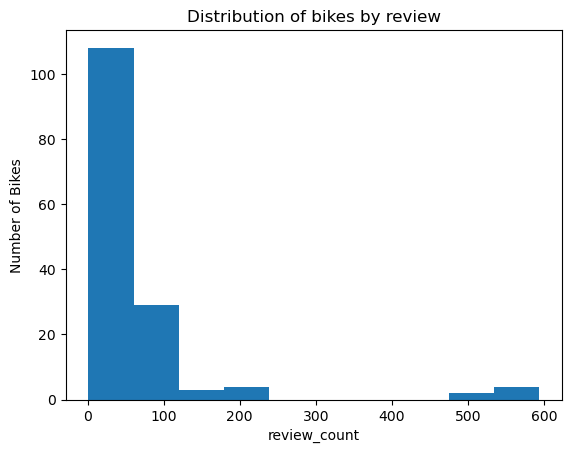

In [34]:
#Distribution of bikes by reviews
plt.hist(merged_df['review_count'], bins=10)
plt.xlabel('review_count')
plt.ylabel('Number of Bikes')
plt.title('Distribution of bikes by review')
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [38]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('poi_data.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Example 1: Querying data
# Execute a SELECT query to retrieve data from the database
cursor.execute("SELECT * FROM poi_data")
rows = cursor.fetchall()
for row in rows:
    poi_id = row[0]
    poi_name = row[1]
    poi_category = row[2]
print(row)
# Close the cursor and connection
#cursor.close()
#conn.close()

(149, 'ld0max-y0Uba4gUDC9c4Yg', 'Bombay Chowpatty', 'https://s3-media1.fl.yelpcdn.com/bphoto/7QKWWeXKVVaxKYBTr_KeSA/o.jpg', 0, 'https://www.yelp.com/biz/bombay-chowpatty-toronto?adjust_creative=_tMLc3Fq61-Ak1Hw0WyJWA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=_tMLc3Fq61-Ak1Hw0WyJWA', 58, 'Vegetarian', 3.0, '1386 Gerrard St E', '+1 416-405-8080', 835.902608, -79.317693, 43.666224, 43.67198226, -79.32437406, 'Queen St. E / Rhodes Ave.', -79.317693, 10)


In [39]:
# Example 3: Retrieving specific information
# Execute a SELECT query with filters to retrieve specific information
cursor.execute("SELECT name FROM poi_data WHERE categories = 'India'")
filtered_rows = cursor.fetchall()

# Process the filtered data
for row in filtered_rows:
    poi_name = row[1]
    # Do something with the retrieved data

# Close the database connection
conn.close()

Look at the data before and after the join to validate your data.

In [ ]:
#Validating my database

In [42]:
import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect("C:\\Users\\iykeo\\poi_data.db")

# Write the SQL query
SQL = '''
SELECT id, name, categories
FROM poi_data
'''

# Execute the query and fetch all the results into a DataFrame
df = pd.read_sql_query(SQL, conn)

# Print the DataFrame
print(df)

                         id                 name    categories
0    yP71_LfUPnGIRqA2g09RoQ            Lake Inez  Asian Fusion
1    Ohengzi4viLEXqhK50aLxg             Jaclyn's     Caribbean
2    dAmVTQ6ukuLh4UxTmBoRkg               Maha's    Sandwiches
3    oWTn2IzrprsRkPfULtjZtQ  The Burger's Priest       Burgers
4    opy1am7eajjAO2-eyojoIw           McDonald's  Coffee & Tea
..                      ...                  ...           ...
145  irIovNOjRHVBV0uO5KX4UQ          Desi Burger       Burgers
146  Zru9ASPdsLSjfIlpozgeMA         Puerto Bravo       Seafood
147  3ad6nHvsoZJ8cPVpSguM_A          Hakka Flame         Hakka
148  Z1r6b30Tg0n0ME4-Zj2wQQ      Boardwalk Place          Pubs
149  ld0max-y0Uba4gUDC9c4Yg     Bombay Chowpatty    Vegetarian

[150 rows x 3 columns]


In [43]:
import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect("C:\\Users\\iykeo\\poi_data.db")

# Write the SQL query
SQL = '''
SELECT "Number of Bikes"
FROM poi_data
'''

# Execute the query and fetch all the results into a DataFrame
df = pd.read_sql_query(SQL, conn)

# Print the DataFrame
print(df)

     Number of Bikes
0                 18
1                 18
2                 18
3                 18
4                 18
..               ...
145               10
146               10
147               10
148               10
149               10

[150 rows x 1 columns]
